# Thresholding

When you threshold an image, it is converted to a *binary* image, that means you have only black (0) and white (1 or 255) values.

## Global tresholding

It is performed through the following equation:

\begin{align}
\large
g(x,y)=
\begin{cases}
    1, & \text{if } f(x,y) \geq T\\
    0, & \text{if } f(x,y) < T
\end{cases}
\end{align}

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.draw import line_aa

def plotDFT(I):
    plt.subplot(121)
    plt.imshow(I, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

    f = np.fft.fft2(I)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)

    plt.subplot(122)
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title(''), plt.xticks([]), plt.yticks([])

    plt.show()

def plotHist(I, maxHist=3000):
    plt.subplot(1, 2, 1)
    plt.imshow(I, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    axes = plt.subplot(1, 2, 2)
    plt.hist(I.ravel(),256,[0,256]);
    plt.title('Histogram'), plt.xticks([]), plt.yticks([])
    axes.set_ylim([0, maxHist])
    plt.show()
    
def plotThreshold(I, T):
    ret,th1 = cv2.threshold(I,T,255,cv2.THRESH_BINARY)
    plt.subplot(121)
    plt.imshow(I, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(th1, cmap = 'gray')
    plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
def plotAdapThreshold(I, typ, size, C):
    th1 = cv2.adaptiveThreshold(I, 255, typ, cv2.THRESH_BINARY, size, C)
    plt.subplot(121)
    plt.imshow(I, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(th1, cmap = 'gray')
    plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
    plt.show()

### Example with T=100

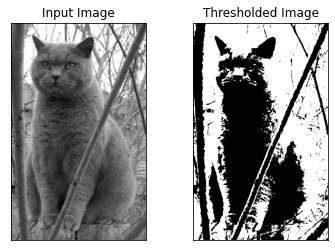

In [3]:
imgCat = cv2.imread('data/img/cat1.jpg',0)
plotThreshold(imgCat, 100)

### Well lit photo

When the illumination is uniform, and you have a defined background and foreground, the histograms shows the separation between them.

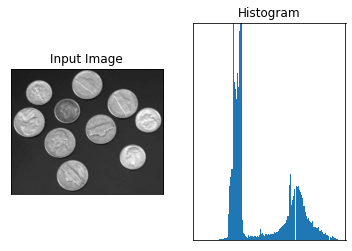

In [4]:
imgCoins = cv2.imread('data/img/coins.png',0)
plotHist(imgCoins, 2500)

Applying T=85 (value getted empirically), you could get:

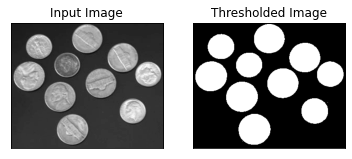

In [5]:
plotThreshold(imgCoins, 85)

### Ill-lit photo

It the image does not have an uniform illumination, the global thresholding is not a good practice:

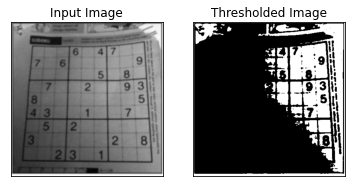

In [6]:
imgSudoku = cv2.imread('data/img/sudoku.png',0)
plotThreshold(imgSudoku, 140)

## Adaptive Mean Thresholding

The threshold for each pixel is the mean of its neighbors, minus $C$.

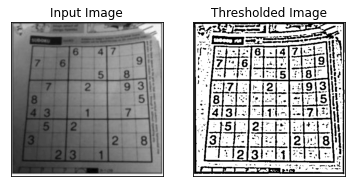

In [10]:
plotAdapThreshold(imgSudoku, typ=cv2.ADAPTIVE_THRESH_MEAN_C, size=11, C=2)

## Adaptive Gaussian Thresholding

The threshold for each pixel is the $size \times size$ window, weighted by a gaussian kernel, minus $C$.

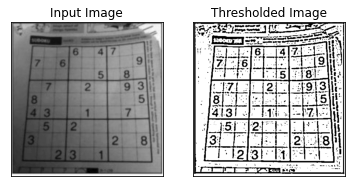

In [11]:
plotAdapThreshold(imgSudoku, typ=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, size=11, C=2)

## Otsu’s Binarization

It is based on finding the threshold that maximize inter-class variance of the histogram:

\begin{align}
\sigma^2_b(t) =\omega_0(t) \omega_1(t) \left[\mu_0(t)-\mu_1(t)\right]^2
\end{align}

![SegmentLocal](res/img/otsu.gif "segment")

Source: https://en.wikipedia.org/wiki/Otsu%27s_method

Examples:

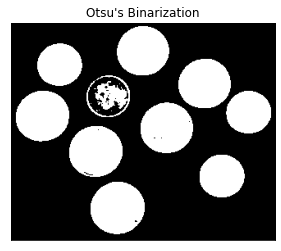

In [12]:
_,maskOtsuCoins = cv2.threshold(imgCoins,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(maskOtsuCoins, cmap = 'gray')
plt.title("Otsu's Binarization"), plt.xticks([]), plt.yticks([])
plt.show()

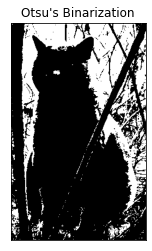

In [13]:
_,maskOtsuCat = cv2.threshold(imgCat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(maskOtsuCat, cmap = 'gray')
plt.title("Otsu's Binarization"), plt.xticks([]), plt.yticks([])
plt.show()

## Windowed Thresholding

You can also binarize an image though a window, or range. Consider the limits $gray_{min}$ and $gray_{max}$. So, the thresholded image should be:

\begin{align}
\large
g(x,y)=
\begin{cases}
    1, & \text{if }  gray_{min} \geq f(x,y) \geq gray_{max}\\
    0, & otherwise
\end{cases}
\end{align}

For example, for $gray_{min}=100$ and $gray_{max}=200$:

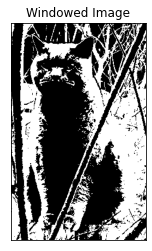

In [14]:
imgCatWindow = cv2.inRange(imgCat, 100, 200)
plt.imshow(imgCatWindow, cmap = 'gray')
plt.title('Windowed Image'), plt.xticks([]), plt.yticks([])
plt.show()

And its oposite:

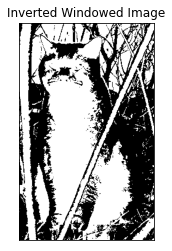

In [15]:
imgCatWindowNot = cv2.bitwise_not(imgCatWindow)
plt.imshow(imgCatWindowNot, cmap = 'gray')
plt.title('Inverted Windowed Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Color thresholding

In order to binarize an image from colors, you must determinate the limits in the HSV color space:

\begin{align}
hsv_{min} = (h_{min}, s_{min}, v_{min})
\end{align}

\begin{align}
hsv_{max} = (h_{max}, s_{max}, v_{max})
\end{align}

And the thesholding is performed as following:

\begin{align}
\large
g(x,y)=
\begin{cases}
    1, & \text{if } ( h_{min} \geq f_h(x,y) \geq h_{max} ) \wedge ( s_{min} \geq f_s(x,y) \geq s_{max} ) \wedge ( v_{min} \geq f_v(x,y) \geq v_{max} ) \\
    0, & \text{otherwise}
\end{cases}
\end{align}

Example:

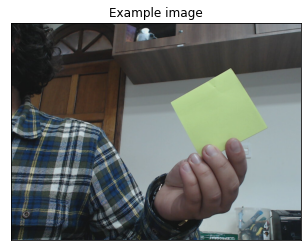

In [17]:
imgGreen1 = cv2.imread('res/img/green1.jpg')
plt.imshow(imgGreen1[...,::-1])
plt.title('Example image'), plt.xticks([]), plt.yticks([])
plt.show()

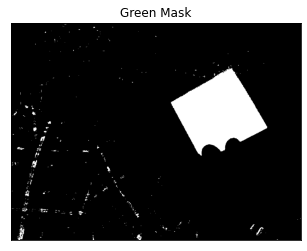

In [18]:
greenLower = (29, 40, 6)
greenUpper = (64, 255, 255)
hsv = cv2.cvtColor(imgGreen1, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
plt.imshow(mask, cmap = 'gray')
plt.title('Green Mask'), plt.xticks([]), plt.yticks([])
plt.show()

Some morphological processing to remove noise.

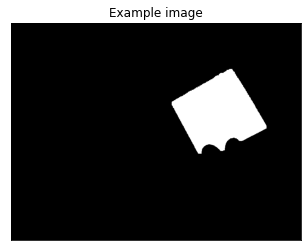

In [19]:
mask = cv2.erode(mask, None, iterations=4)
mask = cv2.dilate(mask, None, iterations=4)
plt.imshow(mask, cmap = 'gray')
plt.title('Example image'), plt.xticks([]), plt.yticks([])
plt.show()

Other example:

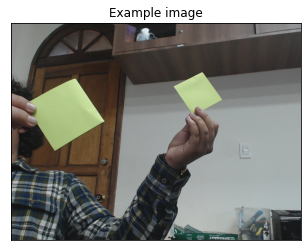

In [21]:
imgGreen2 = cv2.imread('res/img/green2.jpg')
plt.imshow(imgGreen2[...,::-1])
plt.title('Example image'), plt.xticks([]), plt.yticks([])
plt.show()

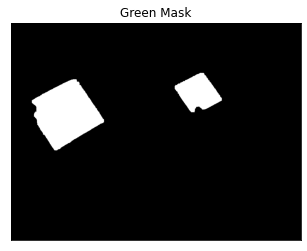

In [22]:
hsv = cv2.cvtColor(imgGreen2, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=4)
mask = cv2.dilate(mask, None, iterations=4)
plt.imshow(mask, cmap = 'gray')
plt.title('Green Mask'), plt.xticks([]), plt.yticks([])
plt.show()